##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import glob

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
import cufflinks as cf

In [6]:
#read data set
data = pd.read_csv('project 4 data.csv')

In [7]:
data.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [9]:
data.isnull().any().sum()

0

In [10]:
#checking duplicate value
df = pd.DataFrame(data)
duplicate_rows = df.duplicated()
duplicate_count = duplicate_rows.sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])

Number of duplicate rows: 0


### Analytical Questions
1. Average GPA by Class: What is the average GPA for each class?
2. Gender Performance Comparison: How do male and female students compare
in terms of average GPA?
3. Race Performance Analysis: What is the average GPA for students of different
races?
4. Course Performance: How do students perform in different courses (Algebra,
Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)?
5. Correlation with GPA: What is the correlation between GPA and performance in
individual courses?
6. Performance Distribution: What is the distribution of GPAs across all students?
7. Top Performers: Who are the top 10 students in terms of GPA?
8. Course Difficulty: Which courses have the lowest average scores, indicating
higher difficulty?


### 1. Average GPA by Class: What is the average GPA for each class?


In [11]:
# Calculate the average GPA for each class
average_gpa_by_class = data.groupby('class')['GPA'].mean()

#display the average GPA for each class
print(average_gpa_by_class)

class
A    82.844605
B    83.251724
Name: GPA, dtype: float64


### 2. Gender Performance Comparison: How do male and female students compare in terms of average GPA?



In [12]:
# Calculate the average GPA for male and female students
average_gpa_by_gender = data.groupby('gender')['GPA'].mean()

#print the average gpa by gender
print(average_gpa_by_gender)

gender
female    83.558235
male      81.852162
Name: GPA, dtype: float64


### 3. Race Performance Analysis: What is the average GPA for students of different races?



In [13]:
# Calculate the average GPA for each race
average_gpa_by_race = data.groupby('race')['GPA'].mean()
# Display the result
print(average_gpa_by_race)

race
1    83.909012
2    80.156667
3    81.388333
4    78.897500
5    73.400000
6    83.955000
7    81.592000
Name: GPA, dtype: float64


### 4. Course Performance: How do students perform in different courses (Algebra,Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)?


In [14]:
# List of course columns
courses = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average score for each course
average_scores = data[courses].mean()

# Print the average scores
print(average_scores)

Algebra                76.057143
Calculus1              71.961905
Calculus2              78.942857
Statistics             85.133333
Probability            83.876190
Measure                80.761905
Functional_analysis    75.323810
dtype: float64


### 5. Correlation with GPA: What is the correlation between GPA and performance in individual courses?



In [15]:
# Calculate the correlation between GPA and performances in individual courses
correlation_with_gpa =data[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']]

#Filtering categorical Features
correlation_with_gpa.head()

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,73.47,64,81,87,60,74,71,60
1,71.22,57,50,51,51,55,62,61
2,74.56,47,48,71,60,61,68,64
3,72.89,46,72,38,60,29,54,51
4,70.11,49,45,63,60,66,66,61


In [16]:
#calculate the correlation between GPA 
corr = correlation_with_gpa.corr()
corr

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
GPA,1.000000,0.761590,0.660560,0.803865,0.740903,0.732898,0.758676,0.809451
Algebra,0.761590,1.000000,0.608083,0.640578,0.759595,0.752480,0.755499,0.572575
Calculus1,0.660560,0.608083,1.000000,0.588929,0.547605,0.484766,0.471347,0.430825
Calculus2,0.803865,0.640578,0.588929,1.000000,0.640908,0.638694,0.658728,0.672529
Statistics,0.740903,0.759595,0.547605,0.640908,1.000000,0.716918,0.644505,0.469362
Probability,0.732898,0.752480,0.484766,0.638694,0.716918,1.000000,0.704155,0.547730
Measure,0.758676,0.755499,0.471347,0.658728,0.644505,0.704155,1.000000,0.596535
Functional_analysis,0.809451,0.572575,0.430825,0.672529,0.469362,0.547730,0.596535,1.000000


### 6. Performance Distribution: What is the distribution of GPAs across all students?


count    105.000000
mean      82.957048
std        6.053187
min       63.490000
25%       79.340000
50%       84.110000
75%       87.300000
max       93.710000
Name: GPA, dtype: float64


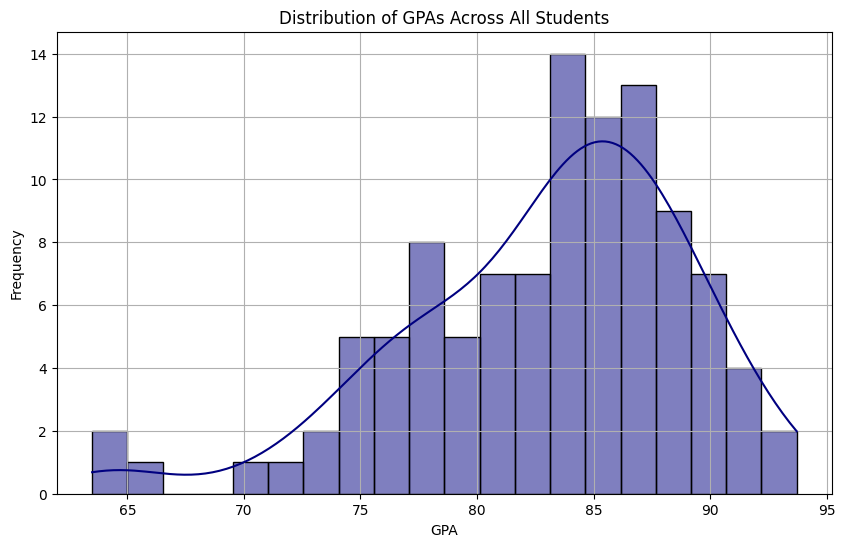

In [17]:
# Calculate descriptive statistics for GPA
gpa_statistics = data['GPA'].describe()

print(gpa_statistics)

# Create a histogram to visualize the distribution of GPAs across all students
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=20, kde=True, color='navy')
plt.title('Distribution of GPAs Across All Students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
#!pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


### 7. Top Performers: Who are the top 10 students in terms of GPA?


In [21]:
# Get the top 10 students based on GPA
top_10_students = data.nlargest(10, 'GPA')

# Display the top 10 students in tabular form
print(top_10_students.to_markdown(index=False))

|   ID | class   | gender   |   race |   GPA |   Algebra |   Calculus1 |   Calculus2 |   Statistics |   Probability |   Measure |   Functional_analysis | from1   | from2   | from3   |   from4 |   y |
|-----:|:--------|:---------|-------:|------:|----------:|------------:|------------:|-------------:|--------------:|----------:|----------------------:|:--------|:--------|:--------|--------:|----:|
| 1245 | A       | male     |      1 | 93.71 |        93 |          97 |          99 |          100 |            97 |        90 |                    90 | K       | B       | A       |       0 |   2 |
| 1209 | A       | female   |      1 | 93.06 |        82 |          90 |          93 |           91 |            93 |        99 |                    94 | M       | B       | S       |       0 |   0 |
| 1216 | A       | female   |      1 | 91.9  |        95 |          86 |          96 |           92 |            95 |        90 |                    95 | Z       | B       | A       |       2 |   1 |


### 8. Course Difficulty: Which courses have the lowest average scores, indicating higher difficulty?



In [21]:
# Selecting only the columns containing course scores
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculating the average score for each course
course_avg_scores = data[course_columns].mean()

# Sorting the courses based on average scores in ascending order
sorted_courses = course_avg_scores.sort_values()

# Displaying the courses with the lowest average scores
print("Courses with the lowest average scores (indicating higher difficulty):")
print(sorted_courses)

Courses with the lowest average scores (indicating higher difficulty):
Calculus1              71.961905
Functional_analysis    75.323810
Algebra                76.057143
Calculus2              78.942857
Measure                80.761905
Probability            83.876190
Statistics             85.133333
dtype: float64


### Visualization Questions
1. GPA Distribution: Create a histogram showing the distribution of GPAs.
2. Average GPA by Gender: Create a bar chart comparing average GPA between
male and female students.
3. Average GPA by Race: Create a bar chart comparing average GPA across
different races.
4. Course Score Trends: Create line charts for the average scores in Algebra,
Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis.
5. Correlation Heatmap: Create a heatmap to visualize the correlation matrix of
GPA and course scores.
6. Box Plot of GPA by Class: Create a box plot to show the distribution of GPAs
for each class.
7. Scatter Plot of GPA vs. Course Scores: Create scatter plots to show the
relationship between GPA and each course score.
8. Course Difficulty: Create a bar chart to show the average scores of each
course, highlighting the most challenging courses.



### 1. GPA Distribution: Create a histogram showing the distribution of GPAs

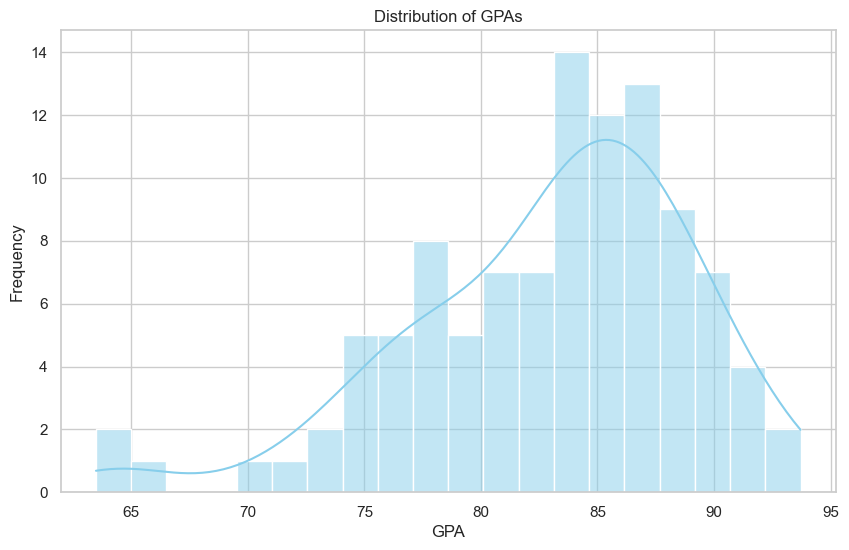

In [28]:
# Set the plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'],bins=20,kde='True',color='skyblue')

# Set the title and labels
plt.title('Distribution of GPAs')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Show plot
plt.show()

### 2. Average GPA by Gender: Create a bar chart comparing average GPA between male and female students.


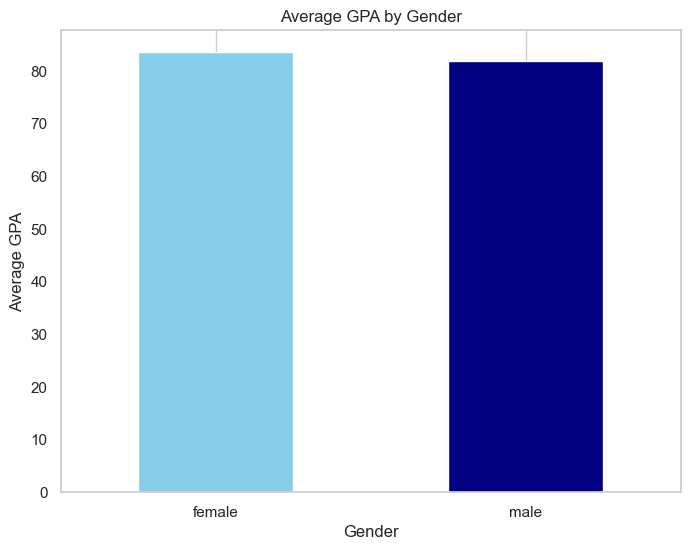

In [23]:
# Create a bar chart for average GPA by gender
plt.figure(figsize=(8, 6))
average_gpa_by_gender.plot(kind='bar', color=['skyblue', 'navy'])
plt.title('Average GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 3. Average GPA by Race: Create a bar chart comparing average GPA across different races.



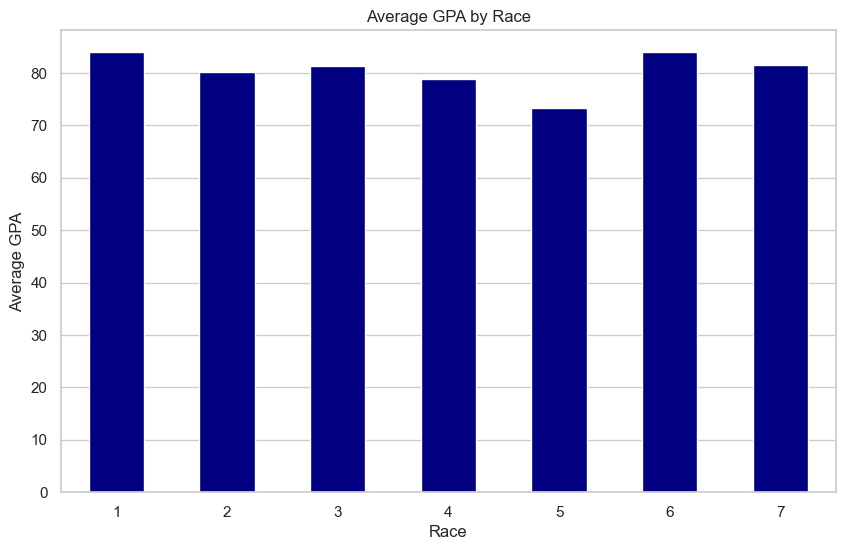

In [26]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_gpa_by_race.plot(kind='bar', color='navy')
plt.title('Average GPA by Race')
plt.xlabel('Race')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.grid(axis='x')

# Display the bar chart
plt.show()

### 4. Course Score Trends: Create line charts for the average scores in Algebra,Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis.


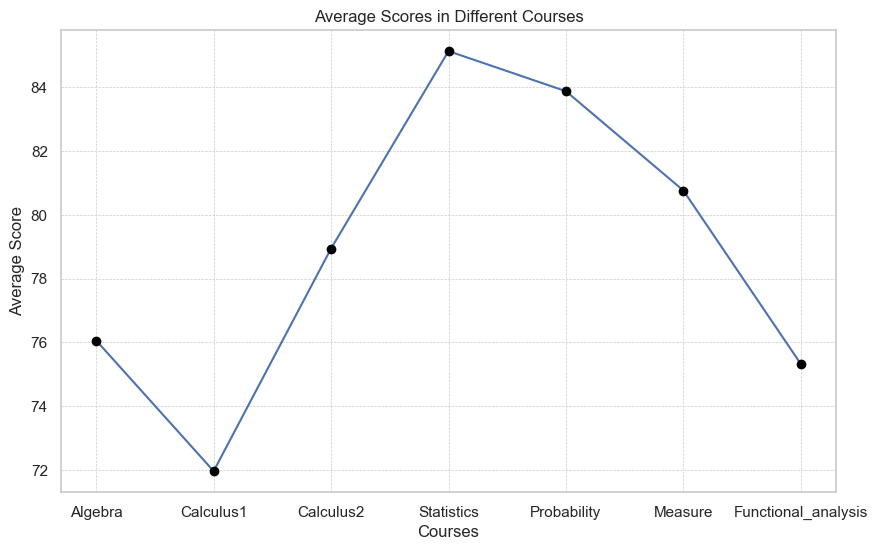

In [25]:
# Calculate the average scores for each course
average_scores = data[['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']].mean()

# Plot line charts for the average scores
plt.figure(figsize=(10, 6))
average_scores.plot(kind='line', marker='o',mfc='black',mec='black')
plt.title('Average Scores in Different Courses')
plt.xlabel('Courses')
plt.ylabel('Average Score')
plt.grid(True,linestyle='dashed',linewidth='0.5')
plt.show()

### 5. Correlation Heatmap: Create a heatmap to visualize the correlation matrix of GPA and course scores


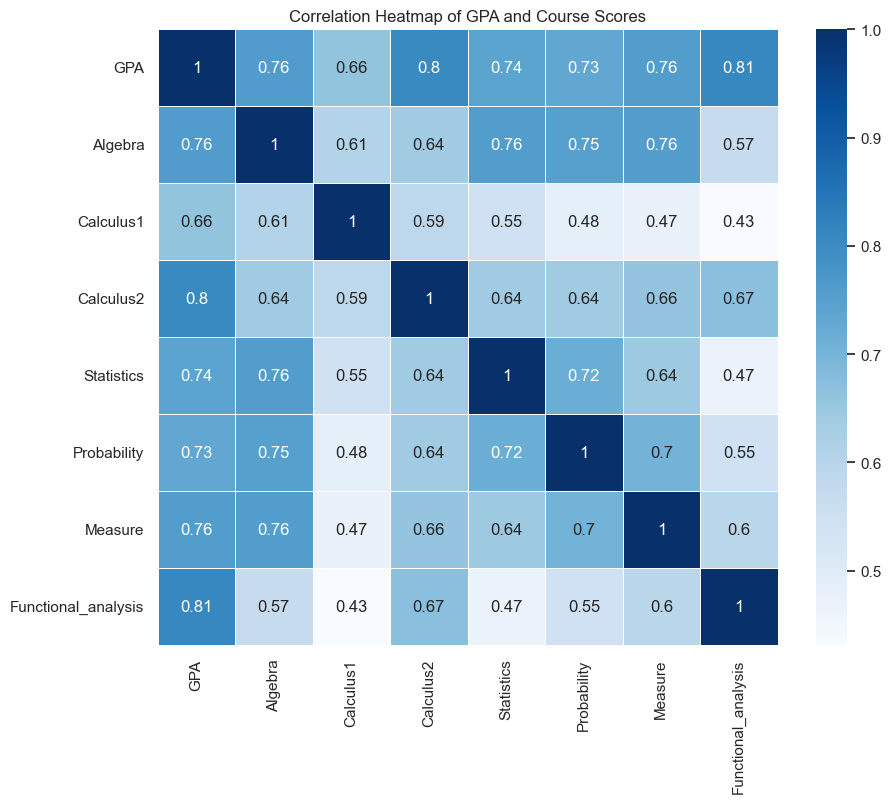

In [36]:
# Selecting GPA and course scores columns
columns_of_interest = ['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']
data_subset = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of GPA and Course Scores')
plt.show()

### 6. Box Plot of GPA by Class: Create a box plot to show the distribution of GPAs for each class.



C:\Users\bithi\AppData\Local\Temp\ipykernel_6936\1316308825.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




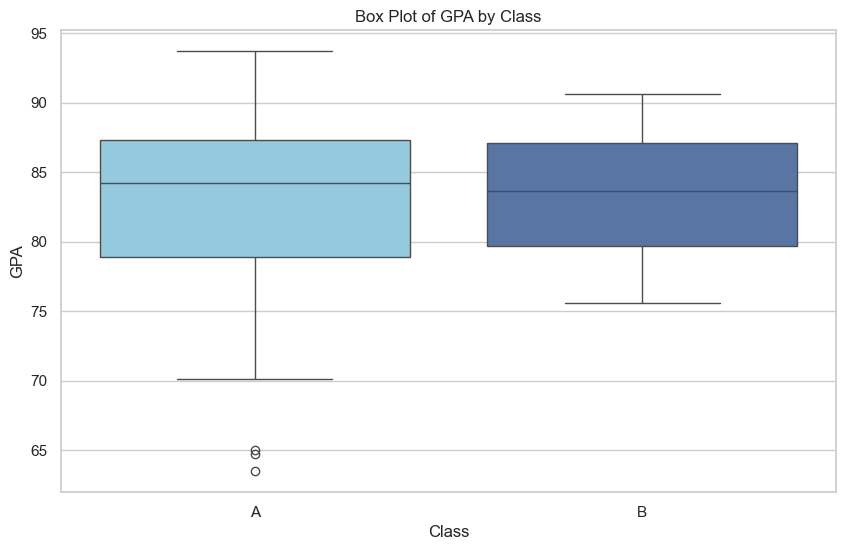

In [69]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='GPA', data=data,palette=['skyblue', 'b'])
plt.title('Box Plot of GPA by Class')
plt.xlabel('Class')
plt.ylabel('GPA')
plt.show()

### 7. Scatter Plot of GPA vs. Course Scores: Create scatter plots to show the relationship between GPA and each course score.



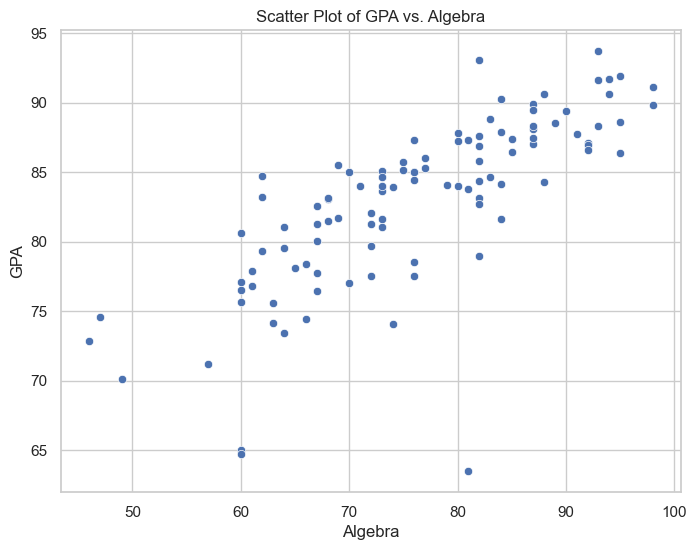

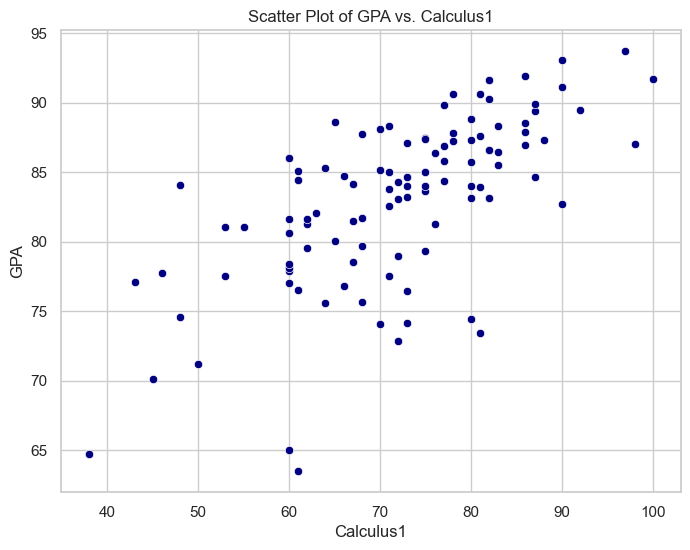

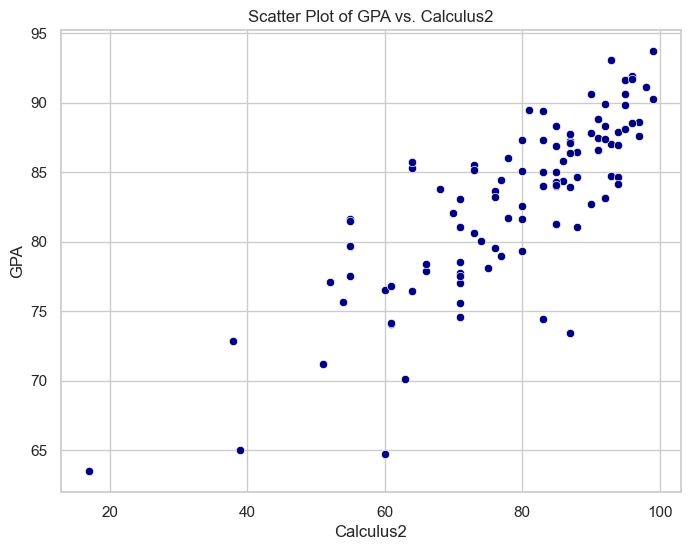

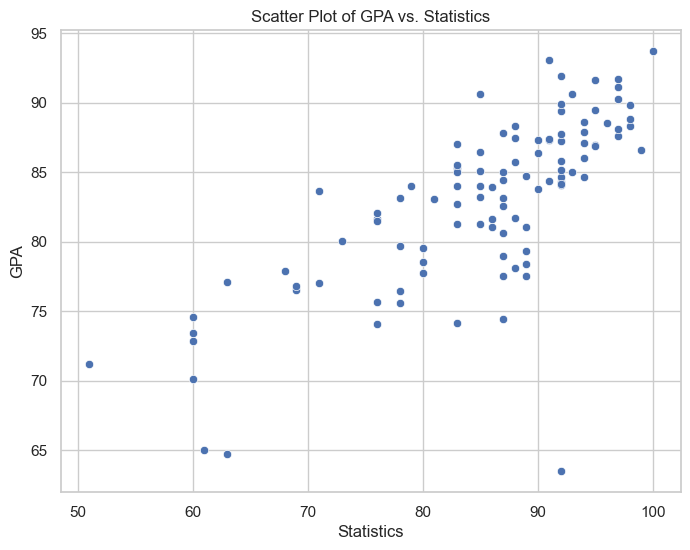

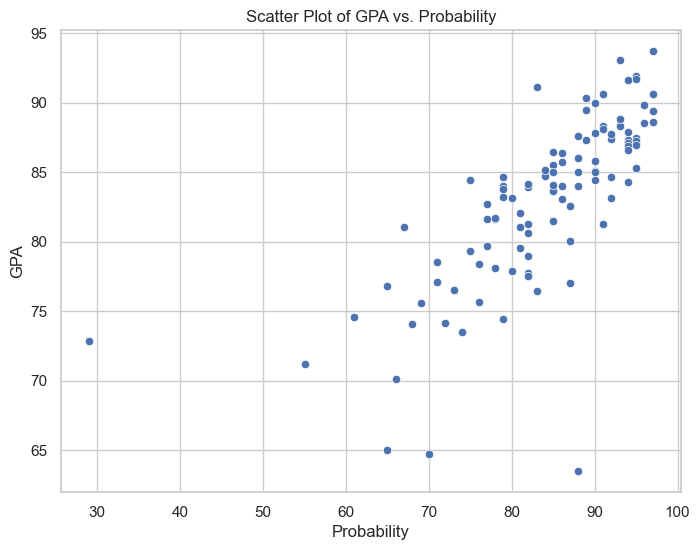

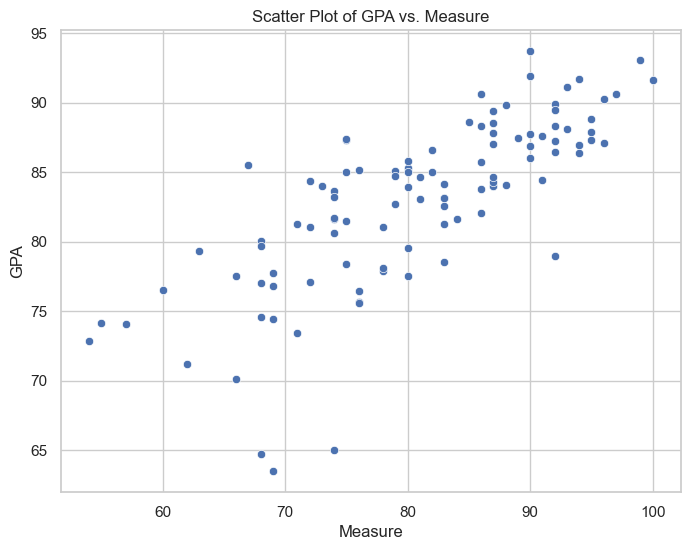

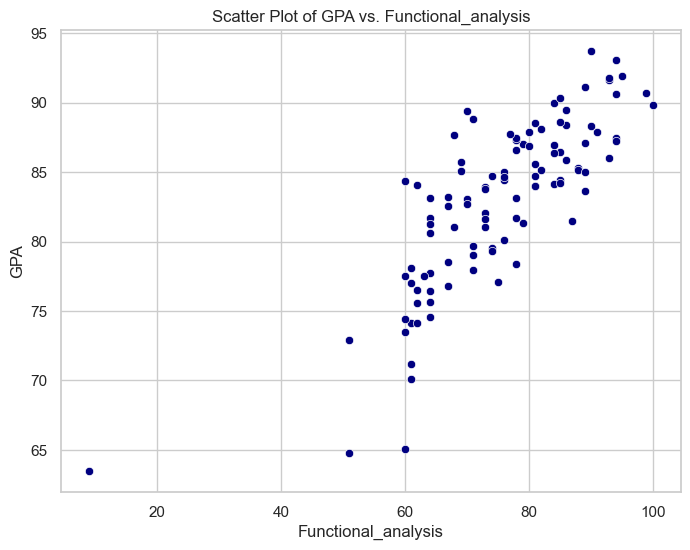

In [27]:

# List of course score columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# List of colors to use
colors=['b','navy','navy','b','b','b','navy']
# Create scatter plots for each course score vs GPA
for course, color in zip(course_columns,colors):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=course, y='GPA', data=data,color=color )
    plt.title(f'Scatter Plot of GPA vs. {course}')
    plt.xlabel(course)
    plt.ylabel('GPA')
    plt.show()

### 8. Course Difficulty: Create a bar chart to show the average scores of each course, highlighting the most challenging courses.


C:\Users\bithi\AppData\Local\Temp\ipykernel_23504\2932207757.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




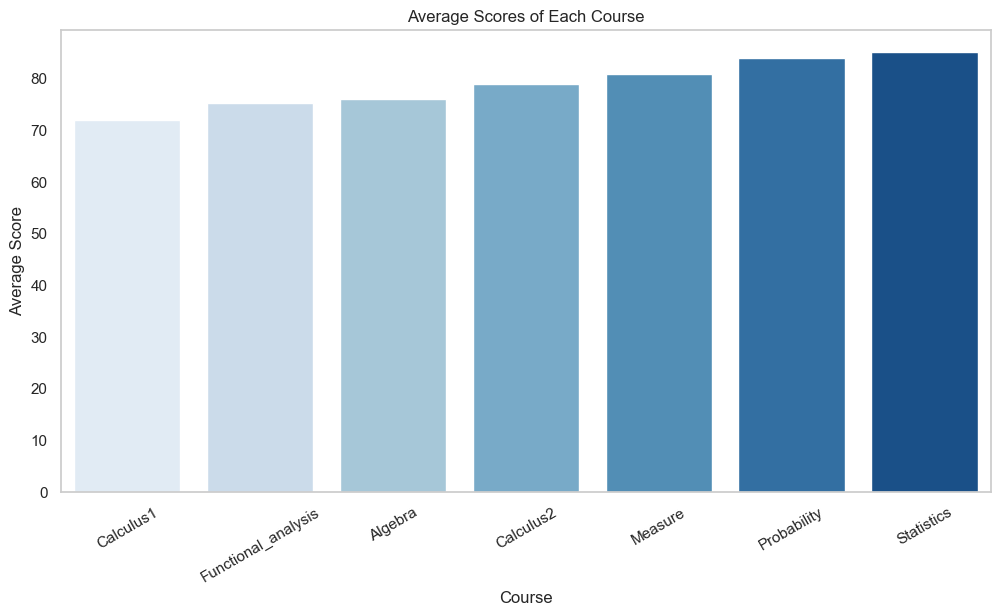

In [30]:
# Calculate the average scores for each course
average_scores = data[course_columns].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores.index, y=average_scores.values,palette='Blues')
plt.title('Average Scores of Each Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()